Using:
    https://gist.github.com/EdwardJRoss/86b31848a7951411de56f10f55e9de4e
    https://forums.fast.ai/t/character-level-language-model/31379
    
Lesson 4 RNN


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.text import *
import string
from unidecode import unidecode


In [3]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

In [4]:
df = pd.read_csv('/home/trpb2/data/takeaway/after_05_12_2019_meeting_multi_cats.csv')

In [5]:
df['text'] = df.text.str.lower()

## Character Set

What letters outside of ASCII are in the names?


In [6]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.text))) if _ not in string.ascii_letters)
foreign_chars.most_common()


[(' ', 78388),
 ("'", 57093),
 (',', 29912),
 ('"', 5670),
 ('&', 2783),
 ('-', 1163),
 ('(', 304),
 (')', 304),
 ('’', 270),
 ('2', 239),
 ('1', 222),
 ('.', 220),
 ('@', 205),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 54),
 ('6', 52),
 ('5', 52),
 ('é', 31),
 ('`', 26),
 ('!', 25),
 ('´', 19),
 ('/', 14),
 ('‘', 7),
 ('+', 7),
 ('#', 7),
 ('?', 4),
 ('ê', 4),
 ('–', 4),
 (':', 4),
 ('°', 3),
 ('*', 3),
 ('ó', 2),
 ('è', 2),
 ('ö', 2),
 ('%', 2),
 ('[', 1),
 ('á', 1),
 ('ü', 1),
 ('®', 1),
 ('~', 1),
 ('\\', 1),
 ('ä', 1),
 (']', 1)]

In [7]:
df['ascii_name'] = df.text.apply(lambda x: unidecode(str(x)))
df[df.text != df.ascii_name]

,label1,label2,label3,text,ascii_name
41,NaN,NaN,NaN,afromumii @ lovelygloworm café,afromumii @ lovelygloworm cafe
82,NaN,NaN,NaN,izatu’s kitchen,izatu's kitchen
122,NaN,NaN,NaN,ruby’s bar and cuisine,ruby's bar and cuisine
173,NaN,Desserts,NaN,auntie anne’s,auntie anne's
211,NaN,Burgers,NaN,bobby jo’s,bobby jo's
366,NaN,Burgers,NaN,friendly phil’s chatham,friendly phil's chatham
387,NaN,Burgers,NaN,harlie’s,harlie's
397,NaN,Pizza,NaN,hot ´n´ tender l1,hot 'n' tender l1
429,NaN,Chicken,NaN,lesley’s hot wings,lesley's hot wings
448,NaN,Burgers,NaN,mark’s american diner,mark's american diner


In [8]:
foreign_chars = Counter(_ for _ in ''.join(str(list(df.ascii_name))) if _ not in string.ascii_letters)
foreign_chars.most_common()

[(' ', 78388),
 ("'", 56823),
 (',', 29912),
 ('"', 6236),
 ('&', 2783),
 ('-', 1167),
 ('(', 305),
 (')', 305),
 ('2', 239),
 ('1', 222),
 ('.', 220),
 ('@', 205),
 ('4', 122),
 ('0', 114),
 ('3', 83),
 ('8', 74),
 ('9', 61),
 ('7', 54),
 ('6', 52),
 ('5', 52),
 ('`', 26),
 ('!', 25),
 ('/', 14),
 ('+', 7),
 ('#', 7),
 ('?', 4),
 (':', 4),
 ('*', 3),
 ('%', 2),
 ('[', 1),
 ('~', 1),
 ('\\', 1),
 (']', 1)]

In [9]:
df['ascii_name_fix'] = df.ascii_name.str.replace('`',"'")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('~'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(']'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('['," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('\\'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('%'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('*'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace(':'," ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('+'," and ")
df['ascii_name_fix'] = df.ascii_name_fix.str.replace('/'," ")
suss_chars = ['`',']','%']
df[df.ascii_name_fix.str.contains('|'.join(suss_chars))]

,label1,label2,label3,text,ascii_name,ascii_name_fix


## Check for duplicates


convert long to wide

In [10]:
label1 = df.label1.unique()
label2 = df.label2.unique()
#label3 = df.label3.unique()
#labels = list(set().union(label1, label2, label3))
labels = list(set().union(label1, label2))

In [11]:
miss_1 = list(set(labels) - set(label1))
miss_2 = list(set(labels) - set(label2))
#miss_3 = list(set(labels) - set(label3))

In [12]:
#df.pivot(index='ascii_name_fix', columns='label1', values='label1')
dummies1 = pd.get_dummies(data = df['label1'])
dummies2 = pd.get_dummies(data = df['label2'])
#dummies3 = pd.get_dummies(data = df['label3'])

In [13]:
#pd.concat([dummies1,pd.DataFrame(columns=miss_1)])
dummies1.reindex(columns=labels, fill_value=0)
dummies2.reindex(columns=labels, fill_value=0)
#dummies3.reindex(columns=labels, fill_value=0)
#dummy_all = (dummies1|dummies2|dummies3).astype(int)
dummy_all = (dummies1|dummies2).astype(int)

In [14]:
df2=pd.concat([df['ascii_name_fix'],dummy_all], axis=1)
len(df2)

29913

Check the one hot encoding

In [15]:
df2[df2['ascii_name_fix']=='africfood']

,ascii_name_fix,Burgers,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sandwich / Coffee Shops / Bakery
38,africfood,0,0,0,0,0,0,0,0,0


In [16]:
name_classes = df2.groupby(df2.columns.tolist()).size().reset_index(name='count')

In [17]:
name_classes.loc[name_classes['count']> 10,['ascii_name_fix', 'count']]

,ascii_name_fix,count
2050,bengal spice,24
3800,charcoal grill,15
4387,china chef,14
4406,china express,15
4411,china garden,32
4418,china house,13
4445,china town,14
4691,cinnamon,14
6143,dixy chicken,20
6144,dixy chicken,15


In [18]:
df2[df2['ascii_name_fix']=='dixy chicken']

,ascii_name_fix,Burgers,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sandwich / Coffee Shops / Bakery
292,dixy chicken,1,0,0,0,0,0,0,0,0
293,dixy chicken,0,1,0,0,0,0,0,0,0
294,dixy chicken,0,1,0,0,0,0,0,0,0
295,dixy chicken,0,1,0,0,0,0,0,0,0
296,dixy chicken,0,1,0,0,0,0,0,0,0
297,dixy chicken,0,1,0,0,0,0,0,0,0
298,dixy chicken,0,1,0,0,0,0,0,0,0
299,dixy chicken,0,1,0,0,0,0,0,0,0
3546,dixy chicken,0,1,0,0,0,0,0,0,0
3547,dixy chicken,0,1,0,0,0,0,0,0,0


In [19]:
df3=pd.concat([df2['ascii_name_fix'],df2.groupby('ascii_name_fix').transform('any').astype(int)], axis=1)
len(df3)

29913

In [20]:
df4 = df3.drop_duplicates()
len(df4)

23859

In [21]:
df4[df4['ascii_name_fix']=='dixy chicken']

,ascii_name_fix,Burgers,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sandwich / Coffee Shops / Bakery
292,dixy chicken,1,1,0,1,0,0,0,1,0



### Distribution by Language

The dataset is very unbalanced.


In [22]:
df4.sum(axis=0)[1:].sort_values(ascending =True)

Desserts                            1390
Fish & Chips                        2046
Sandwich / Coffee Shops / Bakery    2212
Burgers                             2264
Chicken                             2289
Chinese                             3395
Kebab                               5350
Indian                              6325
Pizza                               7281
dtype: object


## Create Validation and Training Sets

We want our final model to work well on any language.

But if we pick our validation set uniformly at random from the data we're likely to get many Indian and not many African, which isn't a good test of this.

So instead we'll take our validation set from an equal number from each subclass.


In [23]:
df4 = df4.reset_index().drop('index', 1)

In [24]:
counts = df4.sum(axis=0)[1:].sort_values(ascending =True)
counts.keys()

Index(['Desserts', 'Fish & Chips', 'Sandwich / Coffee Shops / Bakery',
       'Burgers', 'Chicken', 'Chinese', 'Kebab', 'Indian', 'Pizza'],
      dtype='object')

In [26]:
valid_size = 500 # We'll pick 30 at random from each subclass
train_size = 6000 # For a balanced training set we'll pick 500 at random with replacement

In [27]:
np.random.seed(6011)
df4['valid'] = False
valid_idx = []
for label in counts.keys():
    # Random sample of size "valid_size" for each class
    #valid_idx += list(df4[(df4[label] == 1) & ~df4.valid].sample(valid_size).index)
    valid_idx += list(df4[(df4[label] == 1)].sample(valid_size).index)
    #df4.loc[valid_idx, 'valid'] = True
df4.loc[valid_idx, 'valid'] = True

In [28]:
len(df4[df4['valid']==True])

4285

In [29]:
len(df4.columns.tolist())

11

In [30]:
np.random.seed(7012)
balanced_idx = []
for label in counts.keys():
    # Random sample of size "train_size" for each class from the data outside of the validation set
    balanced_idx += list(df4[(df4[label] == 1) & ~df4.valid].sample(train_size, replace=True).index)

In [31]:
len(df4)

23859

Let's record our balanced set in the dataframe: this will make it easy to reload at a later point.

In [32]:
df4['bal'] = 0
for k, v in Counter(balanced_idx).items():
    df4.loc[k, 'bal'] += v

In [33]:
df4.to_csv('names_clean_multi.csv', index=False)

In [34]:
df4.head()

,ascii_name_fix,Burgers,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sandwich / Coffee Shops / Bakery,valid,bal
0,ababeel,0,0,0,0,0,0,1,0,0,False,1
1,afghan chopan restaurant,0,0,0,0,0,0,1,0,0,False,0
2,afghan spice takeaway,0,0,0,0,0,0,1,0,0,False,0
3,al taiba bukhari,0,0,0,0,0,1,1,0,0,False,3
4,al-safa restaurant,0,0,0,0,0,0,1,0,0,False,0


## Build a Fastai Data Loader

Load in the dataframe and extract indexes for training, validation and balanced trainings.

In [3]:
df4 = pd.read_csv('names_clean_multi.csv')

valid_idx = df4[df4.valid].index
train_idx = df4[~df4.valid].index

bal_idx = []
for k, v in zip(df4.index, df4.bal):
    bal_idx += [k]*v



In [4]:
class LetterTokenizer(BaseTokenizer):
    "Character level tokenizer function."
    def __init__(self, lang): pass
    def tokenizer(self, t:str) -> List[str]:
        out = []
        i = 0
        while i < len(t):
            if t[i:].startswith(BOS):
                out.append(BOS)
                i += len(BOS)
            else:
                out.append(t[i])
                i += 1
        return out
            
    def add_special_cases(self, toks:Collection[str]): pass

In [5]:
itos = [UNK, BOS] + list(string.ascii_lowercase + " -'@&)(." +"0123456789")

In [6]:
vocab=Vocab(itos)
tokenizer=Tokenizer(LetterTokenizer, pre_rules=[], post_rules=[])

In [7]:
train_df = df4.iloc[train_idx, 0:10]
bal_df = df4.iloc[bal_idx, 0:10]
valid_df = df4.iloc[valid_idx, 0:10]

In [49]:
train_df

,ascii_name_fix,Burgers,Chicken,Chinese,Desserts,Fish & Chips,Indian,Kebab,Pizza,Sandwich / Coffee Shops / Bakery
0,ababeel,0,0,0,0,0,0,1,0,0
1,afghan chopan restaurant,0,0,0,0,0,0,1,0,0
2,afghan spice takeaway,0,0,0,0,0,0,1,0,0
3,al taiba bukhari,0,0,0,0,0,1,1,0,0
4,al-safa restaurant,0,0,0,0,0,0,1,0,0
5,amran grill & pizza,0,0,0,0,0,1,1,0,0
6,ariana flame grill,0,0,0,0,0,0,1,0,0
7,ariana ii - kilburn,0,0,0,0,0,1,1,0,0
8,ariana restaurant,0,0,0,0,0,1,1,0,0
9,balkh restaurant,0,0,0,0,0,0,1,0,0


## Language model

Language model with Just Eat data only

In [8]:
data = TextLMDataBunch.from_df(path='.', train_df=train_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols=0, mark_fields=False, bs=512)

In [12]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


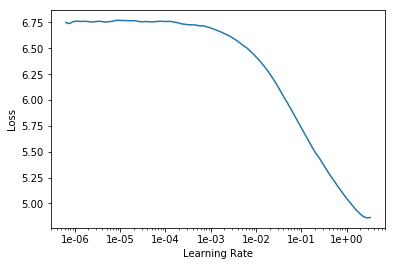

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,6.485972,5.916473,0.045480,00:05
1,5.853712,4.462358,0.096484,00:05
2,5.038223,3.166984,0.144322,00:05
3,4.423561,2.761329,0.211649,00:05
4,3.982985,2.578562,0.255999,00:05
5,3.656172,2.492234,0.280441,00:05
6,3.411972,2.456651,0.282868,00:05
7,3.227278,2.431865,0.289579,00:05
8,3.093958,2.425161,0.287988,00:05
9,2.988554,2.423029,0.289062,00:05


In [16]:
learn.unfreeze()

In [17]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.604180,2.364469,0.304074,00:07
1,2.512649,2.230950,0.352720,00:07
2,2.378639,2.114728,0.389886,00:07
3,2.262332,1.950011,0.424023,00:07
4,2.144041,1.862915,0.451521,00:07
5,2.052262,1.809955,0.463449,00:07
6,1.974553,1.770566,0.481975,00:07
7,1.913326,1.749688,0.487863,00:07
8,1.872672,1.737815,0.489076,00:07
9,1.837855,1.738389,0.489732,00:07


In [18]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.745569,1.735588,0.489886,00:07
1,1.714540,1.706368,0.496331,00:07
2,1.709823,1.684006,0.504157,00:07
3,1.703901,1.787087,0.487430,00:07
4,1.680631,1.620577,0.521359,00:07
5,1.646245,1.591193,0.530064,00:07
6,1.627885,1.572742,0.534375,00:07
7,1.601289,1.565842,0.535561,00:07
8,1.578724,1.560962,0.537193,00:07
9,1.563173,1.561628,0.537095,00:07


In [19]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.542375,1.559327,0.535547,00:07
1,1.530416,1.545105,0.543150,00:07
2,1.509477,1.528399,0.546791,00:07
3,1.496619,1.598190,0.525112,00:07
4,1.512994,1.528596,0.550600,00:07
5,1.488790,1.486422,0.559528,00:07
6,1.479360,1.482232,0.562054,00:07
7,1.461005,1.471041,0.563979,00:07
8,1.454008,1.473299,0.563602,00:07
9,1.438516,1.471511,0.563993,00:07


In [20]:
TEXT = "bob"
N_WORDS = 100
N_SENTENCES = 50

In [21]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

bob b o l d   k e b a b   h o u s e xxbos   s u p e r xxbos   b a l t i   p i z z a xxbos   t h e   d e l i g h t   c h i c k e n xxbos   r o o s t e r s   c h o i c e xxbos   p i z z a   g o g o   f i r e d s n e r xxbos   n e
bob a n   r e s t a u r a n t xxbos   b i t e   c r o m y xxbos   b e s t   b o x xxbos   h a r r y ' s   g r i l l   &   f r i e d   c h i c k e n   &   p i z z a xxbos   t h e   f u s i o n   g r i l l xxbos   s a n d o o
bob a n a   r e s t a u r a n t xxbos   s t t a t i o n xxbos   m o n g h a m xxbos   m a g i n o ' s   b a l t i xxbos   g a r d e n   f a s t   f o o d xxbos   t a s t y   f i s h   &   c h i p s xxbos   l e b a n e s e s e  
bob b e r n   t r a d i t o p a l e xxbos   d e s s e r t   b a l t i xxbos   s h i g h t ' s   f i s h   b a r xxbos   g r e e n   k i t c h e n xxbos   m e a s   p i z z a xxbos   t h e   p i z z a   k y   c h i c k e n xxbos
bob e l l   f r i e d   c h i c k e n xxbos   k i n g s   c h e f xxbos   m e l a k e y   m 

In [22]:
learn.save_encoder('just_eat_enc')

In [ ]:
learn.recorder.plot_losses()

## Classifier with Just Eat data

In [8]:
label_cols = df4.columns.tolist()[1:10]

In [9]:
label_cols

['Burgers',
 'Chicken',
 'Chinese',
 'Desserts',
 'Fish & Chips',
 'Indian',
 'Kebab',
 'Pizza',
 'Sandwich / Coffee Shops / Bakery']

In [10]:
data = TextClasDataBunch.from_df(path='.', train_df=bal_df, valid_df=valid_df,
                         tokenizer=tokenizer, vocab=vocab, text_cols = 0, label_cols = label_cols,
                         mark_fields=False, bs=128)

In [126]:
data.show_batch()

text,target
c h a r c o a l g r i l l t u r k i s h r e s t a u r a n t - s o u t h b u r y r o a d,Kebab;Turkish
d i a g o ' s d e l i h o t s a n d w i c h ' s a n d g o u r m e t b u r g e r s n w,Breakfast;Burgers
j a n c h i k o r e a n k i t c h e n @ b a n g b a n g o r i e n t a l f o o d h a l l,Asian
a p h r o d i t e ' s g r e e k m e d i t e r r a n e a n c u i s i n e & p i z z e r i a,Mediterranean;Pizza
c h a r c o a l g r i l l t u r k i s h r e s t a u r a n t - s o u t h b u r y r o a d,Kebab;Turkish


In [23]:
learn = text_classifier_learner(data, AWD_LSTM, drop_mult=0.8, bptt=70, metrics=[fbeta])


In [24]:
learn.load_encoder('just_eat_enc_bs128_2')

In [25]:
learn.freeze()

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


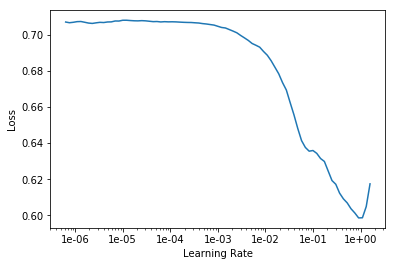

In [55]:
learn.recorder.plot()

In [26]:
lr = 5e-2
moms = (0.2,0.1)
scale = (1**4)
cycles = 5

In [27]:
learn.fit_one_cycle(cycles, lr, moms=moms)

epoch,train_loss,valid_loss,fbeta,time
0,0.355462,0.339202,0.611930,00:14
1,0.357073,0.331509,0.637776,00:13
2,0.343705,0.325172,0.652767,00:13
3,0.326405,0.311569,0.669596,00:13
4,0.324934,0.310936,0.671370,00:13


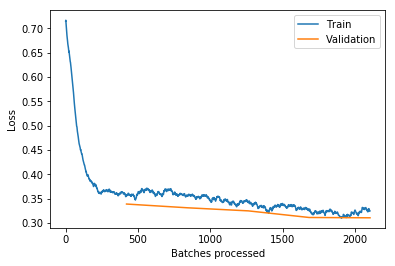

In [28]:
learn.recorder.plot_losses()

In [29]:
learn.freeze_to(-2)

In [30]:
1e-2 / 2 / 5

0.001

In [31]:
learn.fit_one_cycle(cycles, slice((lr/2)/scale,(lr/2)), moms=moms)
#learn.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3), moms=(0.2,0.1))

epoch,train_loss,valid_loss,fbeta,time
0,0.299873,0.309274,0.680119,00:16
1,0.300118,0.305590,0.682325,00:16
2,0.274019,0.305305,0.691628,00:15
3,0.254381,0.304384,0.694866,00:14
4,0.250941,0.309623,0.696771,00:16


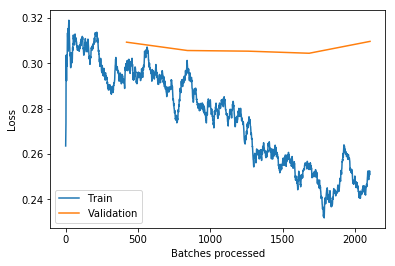

In [32]:
learn.recorder.plot_losses()

In [33]:
learn.freeze_to(-3)
#learn.fit_one_cycle(5, slice(1e-4 / (2.6 ** 4), 1e-4), moms=(0.2, 0.1))
learn.fit_one_cycle(cycles, slice((lr/10)/scale,(lr/10)), moms=moms)

epoch,train_loss,valid_loss,fbeta,time
0,0.241492,0.308726,0.691344,00:24
1,0.240893,0.308793,0.697503,00:24
2,0.226481,0.313474,0.697739,00:24
3,0.208204,0.319650,0.695844,00:22
4,0.201324,0.322185,0.695074,00:23


In [34]:
learn.unfreeze()
learn.fit_one_cycle(cycles, slice((lr/20)/scale,(lr/20)), moms=moms)

epoch,train_loss,valid_loss,fbeta,time
0,0.212248,0.324307,0.698509,00:28
1,0.206941,0.323437,0.694417,00:31
2,0.189318,0.325246,0.695039,00:30
3,0.185586,0.332630,0.695717,00:29
4,0.174345,0.336574,0.694815,00:32


In [35]:
learn.save('multi_cats')

In [35]:
    def confusion_matrix(self):
        "Confusion matrix as an `np.ndarray`"
        x=torch.arange(0,data.c)
        cm = ((self.pred_class==x[:,None]) & (self.y_true==x[:,None,None])).sum(2)
        return cm.cpu().numpy()

    def plot_confusion_matrix(self, normalize:bool=False, title:str='Confusion matrix', cmap:Any="Blues", figsize:tuple=None):
        "Plot the confusion matrix"
        # This function is copied from the scikit docs
        cm = self.confusion_matrix()
        plt.figure(figsize=figsize)
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, self.data.classes, rotation=45)
        plt.yticks(tick_marks, self.data.classes)

        if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [68]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

In [37]:
interp.plot_confusion_matrix(figsize=(10,10))

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'

In [38]:
interp.most_confused()

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'other'

In [72]:
interp.top_losses()

(tensor([15.9808, 14.7814, 12.9131,  ...,  0.0000,  0.0000,  0.0000]),
 tensor([72729, 29448, 45944,  ..., 57872, 52794, 58225]))

In [76]:
interp.data.valid_ds


IndexError: index 72729 is out of bounds for axis 0 with size 2467

In [36]:
learn.predict("tikka masla")

(MultiCategory Indian,
 tensor([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 tensor([5.7367e-02, 4.3599e-05, 2.4877e-04, 7.4033e-05, 3.8356e-06, 9.9994e-01,
         4.4882e-02, 2.9494e-03, 1.3860e-03]))

In [71]:
learn.predict("parmesan")

(MultiCategory Kebab;Pizza,
 tensor([0., 0., 0., 0., 0., 0., 1., 1., 0.]),
 tensor([0.1759, 0.0029, 0.0026, 0.0019, 0.0026, 0.2355, 0.6446, 0.7219, 0.0124]))

In [38]:
learn.predict("ying palace")

(MultiCategory Chinese,
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([3.6203e-04, 4.3588e-04, 9.9860e-01, 1.2155e-04, 1.6355e-02, 1.9028e-03,
         1.8668e-02, 9.0567e-03, 2.1846e-02]))

In [62]:
learn.predict("jamaica jerkin", thresh=0.65)

(MultiCategory ,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([0.3171, 0.0965, 0.0025, 0.0636, 0.0078, 0.0130, 0.5023, 0.1263, 0.1010]))

In [51]:
learn.predict("abra kebabra")

(MultiCategory Kebab,
 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 tensor([2.9176e-01, 2.4120e-02, 3.8013e-03, 5.4265e-04, 6.6423e-03, 2.4904e-01,
         9.6465e-01, 4.4613e-01, 5.1634e-03]))

In [41]:
learn.predict("Piccolo's Coffee & Sandwich Bar")

(MultiCategory Sandwich / Coffee Shops / Bakery,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 tensor([7.4826e-02, 5.9354e-04, 1.7699e-03, 7.1648e-03, 8.6908e-05, 1.7211e-03,
         2.1832e-03, 5.9512e-03, 9.9647e-01]))

In [42]:
learn.predict("southern fried rooster")

(MultiCategory Chicken,
 tensor([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 tensor([4.1841e-01, 9.6307e-01, 1.6041e-05, 9.5183e-03, 3.5259e-03, 1.3440e-03,
         2.4906e-01, 4.7949e-01, 2.7051e-04]))

In [63]:
learn.predict("luigis", thresh=0.65)

(MultiCategory Pizza,
 tensor([0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 tensor([9.7770e-03, 6.9763e-03, 1.5675e-03, 1.5847e-04, 9.0989e-02, 1.8410e-02,
         6.2863e-01, 9.9835e-01, 1.5088e-02]))

In [44]:
learn.predict("mrs boggin's sandwich shop")

(MultiCategory Sandwich / Coffee Shops / Bakery,
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 tensor([1.0824e-01, 7.9522e-06, 2.2877e-04, 8.4549e-05, 5.6837e-06, 1.2090e-05,
         4.0861e-04, 9.8940e-04, 9.9993e-01]))

In [64]:
learn.predict("codfather", thresh=0.65)

(MultiCategory Burgers;Fish & Chips;Kebab;Pizza,
 tensor([1., 0., 0., 0., 1., 0., 1., 1., 0.]),
 tensor([9.4864e-01, 9.6852e-04, 1.2153e-07, 6.4008e-07, 9.9954e-01, 1.2597e-04,
         8.4741e-01, 7.2963e-01, 7.0901e-02]))

In [46]:
learn.predict("munch box")

(MultiCategory Burgers;Pizza;Sandwich / Coffee Shops / Bakery,
 tensor([1., 0., 0., 0., 0., 0., 0., 1., 1.]),
 tensor([6.7583e-01, 3.1582e-01, 4.2480e-04, 2.7445e-02, 1.3239e-04, 4.4131e-03,
         2.9492e-01, 7.1576e-01, 6.8029e-01]))

In [47]:
learn.predict("ming fai")

(MultiCategory Chinese,
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([1.6489e-04, 2.3707e-04, 9.9968e-01, 2.3800e-05, 9.9770e-02, 4.7898e-03,
         7.7510e-04, 1.9702e-04, 3.2855e-02]))

In [66]:
learn.predict("fish'n'chick'n")

(MultiCategory Chicken;Fish & Chips,
 tensor([0., 1., 0., 0., 1., 0., 0., 0., 0.]),
 tensor([6.9063e-02, 2.9936e-01, 6.6646e-03, 1.5645e-04, 9.9783e-01, 2.0362e-03,
         1.5239e-01, 4.4555e-02, 1.3927e-01]))

In [49]:
learn.predict("yoshida sushi")

(MultiCategory Chinese,
 tensor([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 tensor([7.1817e-05, 3.0204e-04, 9.9875e-01, 6.2287e-06, 9.3320e-03, 3.5397e-02,
         2.8654e-03, 7.4963e-04, 1.1936e-02]))

In [55]:
learn.predict("abc barbeque")

(MultiCategory Kebab,
 tensor([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 tensor([2.8985e-01, 2.8169e-01, 1.3500e-02, 4.6086e-04, 4.9779e-02, 5.8175e-02,
         8.6122e-01, 2.6375e-01, 8.4532e-03]))

In [82]:
learn.predict("cocum")

(MultiCategory Indian,
 tensor([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 tensor([0.1030, 0.0673, 0.0315, 0.0141, 0.0014, 0.5994, 0.0458, 0.1653, 0.2926]))